# Reviewing BGD and SGD

- BGD was an optimization algorithm. 
    - Slow on large datasets but resulting in the correct answer.
- SGD was the faster but less accurate version. 
    - Never staying on one target even when it founds the best one.
- BGD used the whole dataset in each iteration where SGD only used **one instance**.

# Mini-Batch GD

Somewhere in between the above two versions. Instead of computing the gradients based on the **whole dataset** or just **one instance** each step, MBGD computes the gradients based on **small random subsets** of the dataset. The main advantage of this method vs. SGD is gaining a performance boost from hardware optimization.

- MBGD has less jumps compared to SGD.
    - The bigger the subset, the lesser the jumps.
- Harder to escape from local minima.

Let's test MBGD on the previous example.

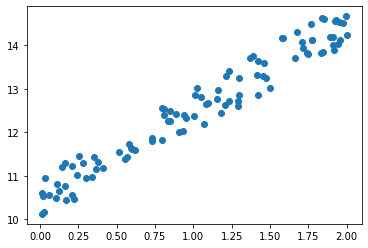

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import random


# Generating a random dataset (a = 2, b = 10)
X = 2 * np.random.rand(100, 1)
Y = 2 * X + 10 + np.random.rand(100, 1)

plt.scatter(X, Y)
plt.show()

In [29]:
alpha = 0.1
num_iter = 1000
n = 100
theta = np.random.randn(2, 1)  # random init (a, b)
print("Init values for a and b:", theta[0], theta[1])

times = [i for i in range(1, num_iter + 1)]
a_history = []
b_history = []

for _ in range(num_iter):
    random_subset = random.sample(range(100), 10)
    iter_x = [X[i] for i in random_subset]
    iter_y = [Y[i] for i in random_subset]
    Xp = np.c_[iter_x, np.ones((10, 1))]  # adding 1 to each instance for the bias
    a_history.append(theta[0])
    b_history.append(theta[1])
    grad = (2/n) * Xp.T.dot(Xp.dot(theta) - iter_y)
    theta = theta - alpha * grad

Init values for a and b: [0.62612481] [-1.00571638]


In [30]:
print("Final values for a and b (true values are 2 and 10):", theta[0], theta[1])

Final values for a and b (true values are 2 and 10): [2.17130651] [10.29719741]


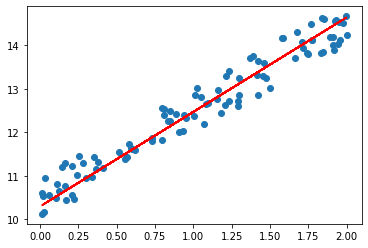

In [31]:
plt.scatter(X, Y)
plt.plot(X, theta[0] * X + theta[1], color="red")
plt.show()

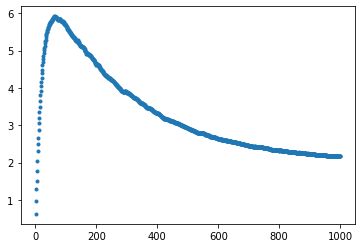

In [32]:
plt.scatter(times, a_history, marker='.')
plt.show()

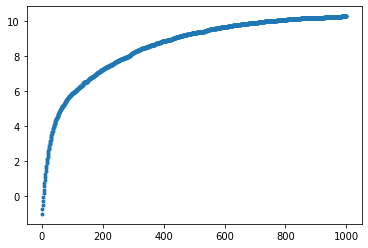

In [33]:
plt.scatter(times, b_history, marker='.')
plt.show()

# Conclusion

All of the above methods reach very similar results after training but you can always try to test them to see which one fits your task the best. 